## Observations and Insights

1. The standard error margins for Ramicane and Capomulin were markedly lower than those for the other drug regimens in this study, while also drawing from larger samples.

2. No potential outliers were detected across the four regimens analyzed (Capomulin, Ramicane, Infubinol, Ceftamin).

3. There was a moderate positive correlation (0.5257) between mouse weight and average tumor volume for the Capomulin regimen.

## Dependencies and starter code

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import scipy.stats as st
import scipy as sp
%matplotlib notebook

# Study data files
mouse_metadata = "data/Mouse_metadata.csv"
study_results = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata)
study_results = pd.read_csv(study_results)

# Combine the data into a single dataset
merge_mouse = pd.merge(mouse_metadata, study_results, on="Mouse ID", how="outer")
merge_mouse.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


## Summary statistics

In [2]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM
# of the tumor volume for each regimen
reg_mea = pd.DataFrame(merge_mouse.groupby(['Drug Regimen']).mean()['Tumor Volume (mm3)'])
reg_mea = reg_mea.rename(columns={'Tumor Volume (mm3)':'Mean'})
reg_med = pd.DataFrame(merge_mouse.groupby(['Drug Regimen']).median()['Tumor Volume (mm3)'])
reg_med = reg_med.rename(columns={'Tumor Volume (mm3)':'Median'})
reg_var = pd.DataFrame(merge_mouse.groupby(['Drug Regimen']).var()['Tumor Volume (mm3)'])
reg_var = reg_var.rename(columns={'Tumor Volume (mm3)':'Variance'})
reg_std = pd.DataFrame(merge_mouse.groupby(['Drug Regimen']).std()['Tumor Volume (mm3)'])
reg_std = reg_std.rename(columns={'Tumor Volume (mm3)':'StDev'})
reg_sem = pd.DataFrame(merge_mouse.groupby(['Drug Regimen']).sem()['Tumor Volume (mm3)'])
reg_sem = reg_sem.rename(columns={'Tumor Volume (mm3)':'SEM'})
regimen = [reg_mea, reg_med, reg_var, reg_std, reg_sem]
regimen = pd.concat(regimen,axis=1,join='inner')
regimen

,Mean,Median,Variance,StDev,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.322552,50.854632,42.351070,6.507770,0.512884
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar plots

Text(0, 0.5, 'Data Points')

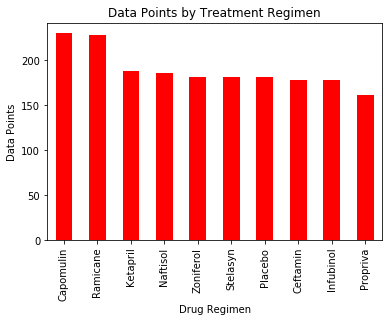

In [3]:
# Generate a bar plot showing number of data points for each treatment regimen using pandas
reg_pandas = merge_mouse['Drug Regimen'].value_counts()
reg_pandas_bar = reg_pandas.plot(kind='bar', facecolor='red')
plt.title('Data Points by Treatment Regimen')
plt.xlabel('Drug Regimen')
plt.ylabel('Data Points')

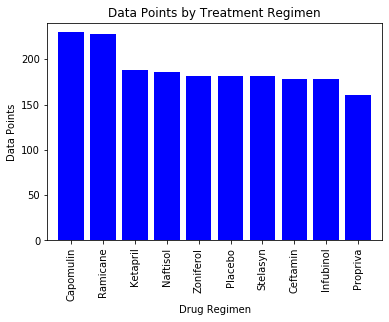

In [4]:
# Generate a bar plot showing number of data points for each treatment regimen using pyplot
reg_pyplot = ['Capomulin', 'Ramicane', 'Ketapril', 'Naftisol', 'Zoniferol', 'Placebo', 'Stelasyn', 'Ceftamin',
              'Infubinol', 'Propriva']
dat_points = [230, 228, 188, 186, 182, 181, 181, 178, 178, 161]
x_axis = np.arange(len(dat_points))
plt.bar(x_axis, dat_points, color='b', align='center')
tick_locations = [value for value in x_axis]
plt.xticks(rotation=90)
plt.xticks(tick_locations, reg_pyplot)
plt.xlim(-0.75, len(x_axis)-0.25)
plt.ylim(0, max(dat_points)+10)
plt.title('Data Points by Treatment Regimen')
plt.xlabel('Drug Regimen')
plt.ylabel('Data Points')
plt.show()

## Pie plots

In [5]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
mal_fem = pd.DataFrame(merge_mouse['Sex'].value_counts())
mal_fem

,Sex
Male,958
Female,935


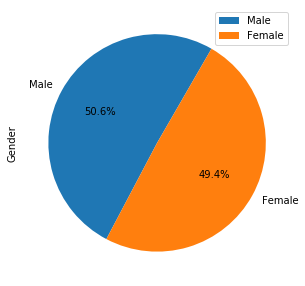

In [6]:
gen_pan = pd.DataFrame({'Gender':[958, 935]}, index = ['Male', 'Female'])
chart_x = gen_pan.plot.pie(y='Gender', figsize=(5, 5), autopct='%1.1f%%', startangle=60)

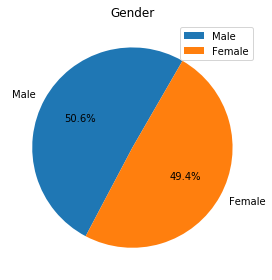

In [7]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
gen_pyp = pd.DataFrame(merge_mouse['Sex'].value_counts())
labels = ['Male', 'Female']
plt.pie(gen_pyp.values.ravel(), labels=labels, autopct='%1.1f%%', startangle=60)
plt.title('Gender')
plt.legend()
plt.tight_layout()
plt.show()

## Quartiles, outliers and boxplots

In [8]:
# Calculate the final tumor volume of each mouse across four of the most promising treatment regimens.
# Calculate the IQR and quantitatively determine if there are any potential outliers.
final_vol = merge_mouse.loc[(merge_mouse['Timepoint'] == 45)]
capo = final_vol.groupby(['Drug Regimen']).get_group('Capomulin')
capo.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
19,s185,Capomulin,Female,3,17,45,23.343598,1
29,x401,Capomulin,Female,16,15,45,28.484033,0
39,m601,Capomulin,Male,22,17,45,28.430964,1
104,u364,Capomulin,Male,18,17,45,31.023923,3
124,y793,Capomulin,Male,17,17,45,31.896238,2


In [9]:
rami = final_vol.groupby(['Drug Regimen']).get_group('Ramicane')
rami.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
9,k403,Ramicane,Male,21,16,45,22.050126,1
49,g791,Ramicane,Male,11,16,45,29.128472,1
59,s508,Ramicane,Male,1,17,45,30.276232,0
74,m546,Ramicane,Male,18,16,45,30.564625,1
84,z578,Ramicane,Male,11,16,45,30.638696,0


In [10]:
infu = final_vol.groupby(['Drug Regimen']).get_group('Infubinol')
infu.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
463,a203,Infubinol,Female,20,23,45,67.973419,2
473,a251,Infubinol,Female,21,25,45,65.525743,1
540,a685,Infubinol,Male,8,30,45,66.083066,3
637,c139,Infubinol,Male,11,28,45,72.226731,2
800,e476,Infubinol,Male,23,26,45,62.435404,1


In [11]:
ceft = final_vol.groupby(['Drug Regimen']).get_group('Ceftamin')
ceft.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
493,a275,Ceftamin,Female,20,28,45,62.999356,3
993,j296,Ceftamin,Female,24,30,45,61.849023,3
1033,k210,Ceftamin,Male,15,28,45,68.923185,3
1112,l471,Ceftamin,Female,7,28,45,67.748662,1
1132,l661,Ceftamin,Male,18,26,45,59.851956,3


In [12]:
capo_quar = capo.quantile([.25,.5,.75])
capo_quar

,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0.25,7.0,17.0,45.0,32.377357,1.0
0.50,16.0,20.0,45.0,37.311846,1.0
0.75,19.0,22.0,45.0,40.159220,2.0


In [13]:
rami_quar = rami.quantile([.25,.5,.75])
rami_quar

,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0.25,7.75,17.00,45.0,30.981175,1.0
0.50,9.00,18.50,45.0,34.848627,1.0
0.75,11.50,21.25,45.0,38.508305,2.0


In [14]:
infu_quar = infu.quantile([.25,.5,.75])
infu_quar

,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0.25,17.0,25.0,45.0,62.754451,1.0
0.50,20.0,26.0,45.0,66.083066,2.0
0.75,23.0,28.0,45.0,67.685569,3.0


In [15]:
ceft_quar = ceft.quantile([.25,.5,.75])
ceft_quar

,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0.25,6.0,26.0,45.0,61.433892,3.0
0.50,15.0,28.0,45.0,64.299830,3.0
0.75,20.0,28.0,45.0,67.527482,3.0


In [16]:
capo_low = capo_quar.iloc[0,3]
capo_upp = capo_quar.iloc[2,3]
capo_iqr = (capo_upp - capo_low).round(3)
rami_low = rami_quar.iloc[0,3]
rami_upp = rami_quar.iloc[2,3]
rami_iqr = (rami_upp - rami_low).round(3)
infu_low = infu_quar.iloc[0,3]
infu_upp = infu_quar.iloc[2,3]
infu_iqr = (infu_upp - infu_low).round(3)
ceft_low = ceft_quar.iloc[0,3]
ceft_upp = ceft_quar.iloc[2,3]
ceft_iqr = (ceft_upp - ceft_low).round(3)
print(f"The IQR for Capomulin is {capo_iqr}.")
print(f"The IQR for Ramicane is {rami_iqr}.")
print(f"The IQR for Infubinol is {infu_iqr}.")
print(f"The IQR for Ceftamin is {ceft_iqr}.")

The IQR for Capomulin is 7.782.
The IQR for Ramicane is 7.527.
The IQR for Infubinol is 4.931.
The IQR for Ceftamin is 6.094.


In [17]:
capo_lob = (capo_low - (1.5 * capo_iqr)).round(3)
capo_upb = (capo_upp + (1.5 * capo_iqr)).round(3)
rami_lob = (rami_low - (1.5 * rami_iqr)).round(3)
rami_upb = (rami_upp + (1.5 * rami_iqr)).round(3)
infu_lob = (infu_low - (1.5 * infu_iqr)).round(3)
infu_upb = (infu_upp + (1.5 * infu_iqr)).round(3)
ceft_lob = (ceft_low - (1.5 * ceft_iqr)).round(3)
ceft_upb = (ceft_upp + (1.5 * ceft_iqr)).round(3)
print(f"Potential outliers for Capomulin are values below {capo_lob} and above {capo_upb}.")
print(f"Potential outliers for Ramicane are values below {rami_lob} and above {rami_upb}.")
print(f"Potential outliers for Infubinol are values below {infu_lob} and above {infu_upb}.")
print(f"Potential outliers for Ceftamin are values below {ceft_lob} and above {ceft_upb}.")

Potential outliers for Capomulin are values below 20.704 and above 51.832.
Potential outliers for Ramicane are values below 19.691 and above 49.799.
Potential outliers for Infubinol are values below 55.358 and above 75.082.
Potential outliers for Ceftamin are values below 52.293 and above 76.668.


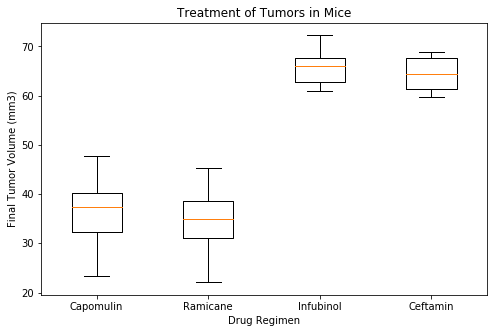

In [18]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
regi_fin = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']
data = [capo['Tumor Volume (mm3)'], rami['Tumor Volume (mm3)'], infu['Tumor Volume (mm3)'], ceft['Tumor Volume (mm3)']]
fig, axs = plt.subplots(figsize=(8, 5))
axs.set_title('Treatment of Tumors in Mice')
axs.set_xlabel('Drug Regimen')
axs.set_ylabel('Final Tumor Volume (mm3)')
axs.set_xticklabels(np.repeat(regi_fin, 1))
axs.boxplot(data)
plt.show()

## Line and scatter plots

In [19]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin
capo_line = merge_mouse.groupby(['Mouse ID']).get_group('y793')
capo_line

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
115,y793,Capomulin,Male,17,17,0,45.000000,0
116,y793,Capomulin,Male,17,17,5,41.019913,0
117,y793,Capomulin,Male,17,17,10,41.630010,1
118,y793,Capomulin,Male,17,17,15,42.283665,1
119,y793,Capomulin,Male,17,17,20,40.716428,2
120,y793,Capomulin,Male,17,17,25,38.992734,2
121,y793,Capomulin,Male,17,17,30,35.726023,2
122,y793,Capomulin,Male,17,17,35,36.327870,2
123,y793,Capomulin,Male,17,17,40,31.475411,2
124,y793,Capomulin,Male,17,17,45,31.896238,2


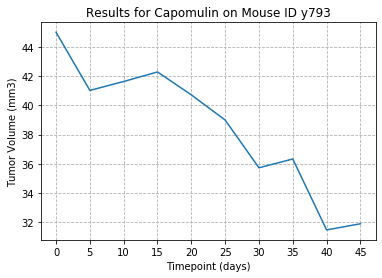

In [20]:
time_pt = capo_line['Timepoint']
volume1 = capo_line['Tumor Volume (mm3)']
plt.plot(time_pt, volume1)
plt.xticks(np.arange(min(time_pt), max(time_pt)+1, 5))
plt.title('Results for Capomulin on Mouse ID y793')
plt.xlabel('Timepoint (days)')
plt.ylabel('Tumor Volume (mm3)')
plt.grid(linestyle='dashed')
plt.show()

In [21]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen
capo_sca = merge_mouse.groupby(['Drug Regimen']).get_group('Capomulin')
capo_sca.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
10,s185,Capomulin,Female,3,17,0,45.000000,0
11,s185,Capomulin,Female,3,17,5,43.878496,0
12,s185,Capomulin,Female,3,17,10,37.614948,0
13,s185,Capomulin,Female,3,17,15,38.177232,0
14,s185,Capomulin,Female,3,17,20,36.866876,0


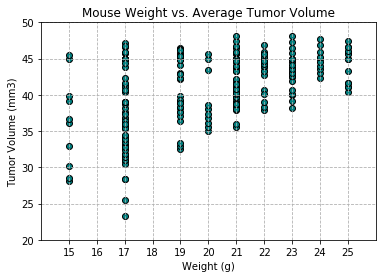

In [22]:
weight = capo_sca['Weight (g)']
tu_vol = capo_sca['Tumor Volume (mm3)']
plt.scatter(weight, tu_vol, marker="o", facecolors="teal", edgecolors="black")
plt.xlim(14,26)
plt.ylim(20,50)
plt.xticks(np.arange(min(weight), max(weight)+1, 1))
plt.title('Mouse Weight vs. Average Tumor Volume')
plt.xlabel('Weight (g)')
plt.ylabel('Tumor Volume (mm3)')
plt.grid(linestyle='dashed')
plt.show()

In [23]:
# Calculate the correlation coefficient and linear regression model for mouse weight
# and average tumor volume for the Capomulin regimen
cor_w_v = st.pearsonr(capo_sca['Weight (g)'],capo_sca['Tumor Volume (mm3)'])
cor_w_v

(0.525699555207717, 9.605446629502006e-18)

In [24]:
mod_w_v = st.linregress(capo_sca['Weight (g)'],capo_sca['Tumor Volume (mm3)'])
mod_w_v

LinregressResult(slope=0.9609669432428346, intercept=21.489827213299584, rvalue=0.5256995552077166, pvalue=9.605446629502282e-18, stderr=0.10298279892023657)

In [25]:
slope = 0.9609669432428346
intercept = 21.489827213299584

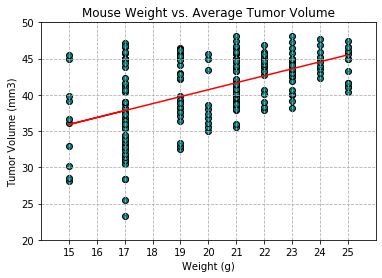

In [26]:
trend = capo_sca['Weight (g)'] * slope + intercept
plt.scatter(weight, tu_vol, marker="o", facecolors="teal", edgecolors="black")
plt.xlim(14,26)
plt.ylim(20,50)
plt.xticks(np.arange(min(weight), max(weight)+1, 1))
plt.title('Mouse Weight vs. Average Tumor Volume')
plt.xlabel('Weight (g)')
plt.ylabel('Tumor Volume (mm3)')
plt.plot(capo_sca['Weight (g)'], trend, color='red')
plt.grid(linestyle='dashed')
plt.show()